Heart Failure/Disease Data Analysis

Name: Kai Archuleta

**Motivation**

In this analysis, we will look at heart failure and heart disease. Accoring to a CDC webpage, https://www.cdc.gov/heartdisease/facts.htm, heart disease is a cause of about one quarter of the deaths in the United States each year. The webpage also indicates that heart disease costs the United States about 363 billion dollars each year from 2016 to 2017. In this analysis, we will be able to learn more about data science and investigate heart disease. We will go through the entire data analysis process and will investigate what is correlated with heart disease. The medical field is full of research studies looking at how factors such as cholesterol and blood pressure relate to heart disease. We will try to better understand this disease with research of our own in this tutorial. We will also try to build machine learning algorithms for heart disease detection. Overall, we will learn more about how to keep a healthy heart while also learning how to analyze data. Better understanding what leads to heart issues can lead to healthier lives and can save the United States (and countries across the globe) billions of dollars each year. 

**Data Collection**

The first step of our analysis will be collecting data. Some health data is conviently stored on Kaggle. You can download the required csv file at the site: https://www.kaggle.com/fedesoriano/heart-failure-prediction.

I imported the data into a pandas DataFrame below. I then printed out the dataframe which we can see below. The pandas library is a great resource for being able to store data in python. I would encourage you to look into the documentation on the pandas official website at this link: https://pandas.pydata.org/.

In [ ]:
import pandas as pd
heart_data = pd.read_csv("heart.csv")
print(heart_data)

     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[918 rows x 12 columns]


**Understanding the dataset**

I would encourage the reader to check out the original kaggle site listed above for more information about the data. It is important that you understand each variable in the data set and how they are measured. This will help you consider what analytical techniques to use as well as how to clean the data properly.

**Data Cleaning**

One important part of cleaning your data is removing missing data. Below, we will drop any rows with missing data. As we can see, no rows were removed, so it appears that we do not have any missing data. This is misleading. The data could have data entered that is filler data such as a 0 for a numerical variable. The computer would think it is a valid value, but as a human we know that a person can't have a blood pressure of 0 for example. Overall, we can see that we have 918 rows without "missing data" excluding "filler data". This is the same number of rows as in the original data frame. 

In [ ]:
import pandas as pd

heart_data = pd.read_csv("heart.csv")
heart_data.dropna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


After looking through our variables, it is clear that a person cannot have a cholesterol of 0 because the human body requires cholesterol. A zero value could be used to fill in for missing data. Let’s remove any rows with a cholesterol of 0. We can see that the number of rows goes down from 918 rows to 746 rows. We will need to remove these rows when we want to use cholesterol in our analysis. There are some more advanced techniques that are quite interesting, such as assigning the missing data an estimate. Here is a resource to learn more about dealing with missing data: https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf. 

In [103]:
import pandas as pd

# read in data into a dataframe
df = pd.read_csv("heart.csv")

#remove rows where the cholesterol levels are 0
df= df[df['Cholesterol'] != 0]

print(df)

     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[746 rows x 12 columns]


After looking through our variable, it is clear that a person cannot have a blood pressure of 0. A zero value could be used as a filler value for missing data because the human body requires blood pressure for life. Let’s remove any rows with a blood pressure of 0. We can see that the number of rows goes down from 918 rows to 917 rows. We will need to remove this row when we want to use blood pressure in our analysis.

In [104]:
import pandas as pd

df = pd.read_csv("heart.csv")

#remove rows with a blood pressure of 0
df = df[df['RestingBP'] != 0]

print(df)

     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[917 rows x 12 columns]


Our categorical data is labeled in such a way that is is very easy to read for a human. Sadly, this is not the case for the computer for some of the algorithms we wish to run. I will change our categorical values to numbers in certain places for our analysis. Below, you can see this being done.

In [105]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("heart.csv")

# create encoders to make labels numeric
ChestPainType = LabelEncoder()
RestingECG = LabelEncoder()
ExcerciseAngina = LabelEncoder()
ST_Slope = LabelEncoder()
Sex = LabelEncoder()

# use encoders to make labels numeric
df['ChestPainType'] = ChestPainType.fit_transform(df['ChestPainType'])
df['RestingECG'] = ChestPainType.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = ChestPainType.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = ChestPainType.fit_transform(df['ST_Slope'])
df['Sex'] = ChestPainType.fit_transform(df['Sex'])

print(df)

     Age  Sex  ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40    1              1  ...      0.0         2             0
1     49    0              2  ...      1.0         1             1
2     37    1              1  ...      0.0         2             0
3     48    0              0  ...      1.5         1             1
4     54    1              2  ...      0.0         2             0
..   ...  ...            ...  ...      ...       ...           ...
913   45    1              3  ...      1.2         1             1
914   68    1              0  ...      3.4         1             1
915   57    1              0  ...      1.2         1             1
916   57    0              1  ...      0.0         1             1
917   38    1              2  ...      0.0         2             0

[918 rows x 12 columns]


**Data Cleaning: Summary**

Overall, we see that there is missing data for cholesterol and blood pressure where the entries are 0. We will need to remove these rows when working with these two variables. We will also want to convert our labels to numerical values for some of our algorithms such as our machine learning algorithms.

**Age vs. Heart Disease:**

First, we will find the link between age and heart disease. Common knowledge tells us that heart disease is asscociated with older age. We will also find the mean using numpy. numpy is a very popular python library for scientific computation. It is built under the hood in C, allowing it to make computations much faster than Python would. I would recommend learning about numpy at this webpage: https://numpy.org/. 

We can see that the average age of people with heart disease is 55.9 and the average person without heart disease is 50.6. This follows common knowledge that older age increases your risk of heart disease.

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# get each row where the individual has heart disease
df = df[df['HeartDisease'] == 1]

df.iloc[:,0:1].apply(np.mean)

Age    55.899606
dtype: float64

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# get each row where the individual does not have heart disease
df = df[df['HeartDisease'] == 0]

df.iloc[:,0:1].apply(np.mean)

Age    50.55122
dtype: float64

Now, lets look at the prevalence of heart disease throughout age. Let's break down our ages into four groups: under 40 (youngest), 40-49 (younger), 50 - 59 (older), 60+ (oldest). We will get the summary statistics and then place them into a bar chart. We are going to use the matplotlib library. This is a fantastic resource for making graphs in python. Learn more about the library at this webpage: https://matplotlib.org/.

In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# get dataframe for rows with age less than 40
df = df[df['Age'] < 40]

# print out the mean
df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.325
dtype: float64

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# get dataframe for rows with age 40-49
df = df[df['Age'] >= 40]
df = df[df['Age'] < 50]

# print out the mean
df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.402844
dtype: float64

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# get dataframe for rows with age 50-59
df = df[df['Age'] >= 50]
df = df[df['Age'] < 60]

# print out the mean
df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.566845
dtype: float64

In [107]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# get dataframe for rows with age 60+
df = df[df['Age'] > 60]

# print out the mean
df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.728507
dtype: float64

Text(0.5, 1.0, 'Heart Disease Prevalence by Age Group')

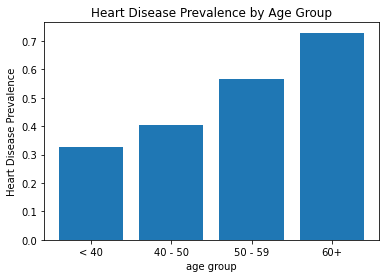

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

#get the age groups
ageGroup = ["< 40", "40 - 50", "50 - 59", "60+"]

# get the rates for each age
diseaseRate = [.325, .402844, 0.566845, 0.728507]

# create bar chart
plt.bar(ageGroup, diseaseRate)

#create labels for chart
plt.xlabel("age group")
plt.ylabel("Heart Disease Prevalence")
plt.title("Heart Disease Prevalence by Age Group")

**Summary: Age vs Heart Disease**

We can see a clear increase in heart disease as you get older. We can see that while under 40 the prevalence was 32.5%, but rose up to a staggering 72.8% at the 60+ range. This shows us that heart disease becomes a more likely issue for individuals as they get older.

**Cholesterol vs Heart Disease**

Many researchers believe that high cholesterol levels are associated with artery blockages and that leads to heart disease. We will test how true this may be. An important consideration is that we are only looking at serum cholesterol, which is a fancy term for total cholesterol. There are various types of cholesterol in the body. Not all cholesterol types are considered bad. A good example is high-density lipoprotein. 

We can see that the average age of people with heart disease is 251.1 and the average person without heart disease is 238.8. This data aligns with the idea that higher cholesterol levels are associated with higher heart disease prevalence.

In [72]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#remove rows with missing cholesterol
df= df[df['Cholesterol'] != 0]

#only rows where person does have heart disease
df = df[df['HeartDisease'] == 1]

df.iloc[:,4:5].apply(np.mean)

Cholesterol    251.061798
dtype: float64

In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#remove rows with missing cholesterol
df= df[df['Cholesterol'] != 0]

#only rows where person does not have heart disease
df = df[df['HeartDisease'] == 0]

df.iloc[:,4:5].apply(np.mean)

Cholesterol    238.769231
dtype: float64

Now, lets look at the prevalence of heart disease throughout cholesterol levels. Let's break down our cholesterol levels into seven groups: 175 or under, 176-200, 201-225, 226-250, 251-275,276-300, and over 300. We will get the summary statistics and then place them into a bar chart. 

In [76]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#only rows where cholesterol levels not missing
df = df[df['Cholesterol'] != 0]

# get rows with proper cholesterol levels
df = df[df['Cholesterol'] < 176]

df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.460317
dtype: float64

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#only rows where cholesterol levels not missing
df = df[df['Cholesterol'] != 0]

# get rows with proper cholesterol levels
df = df[df['Cholesterol'] >= 176]
df = df[df['Cholesterol'] < 201]

df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.344828
dtype: float64

In [78]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#only rows where cholesterol levels not missing
df = df[df['Cholesterol'] != 0]

# get rows with proper cholesterol levels
df = df[df['Cholesterol'] >= 201]
df = df[df['Cholesterol'] < 226]

df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.440789
dtype: float64

In [79]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#only rows where cholesterol levels not missing
df = df[df['Cholesterol'] != 0]

# get rows with proper cholesterol levels
df = df[df['Cholesterol'] >= 226]
df = df[df['Cholesterol'] < 251]

df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.44697
dtype: float64

In [80]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#only rows where cholesterol levels not missing
df = df[df['Cholesterol'] != 0]

# get rows with proper cholesterol levels
df = df[df['Cholesterol'] >= 251]
df = df[df['Cholesterol'] < 276]

df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.508333
dtype: float64

In [81]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#only rows where cholesterol levels not missing
df = df[df['Cholesterol'] != 0]

# get rows with proper cholesterol levels
df = df[df['Cholesterol'] >= 276]
df = df[df['Cholesterol'] < 301]

df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.6125
dtype: float64

In [82]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#only rows where cholesterol levels not missing
df = df[df['Cholesterol'] != 0]

# get rows with proper cholesterol levels
df = df[df['Cholesterol'] > 300]

df.iloc[:,11:12].apply(np.mean)

HeartDisease    0.533981
dtype: float64

Text(0.5, 1.0, 'Heart Disease Prevalence by cholesterol level')

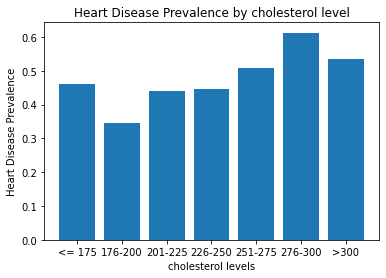

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

# get the cholesterol levels
cholesterolLevels = (["<= 175", "176-200", "201-225",
                      "226-250", "251-275", "276-300",
                      ">300"])

# get the disease rates
diseaseRate = ([0.460317, 0.344828, 0.440789
                , 0.44697, 0.508333, 0.6125, 0.533981])


# make a bar chart of results
plt.bar(cholesterolLevels, diseaseRate)

#make proper labels
plt.xlabel("cholesterol levels")
plt.ylabel("Heart Disease Prevalence")
plt.title("Heart Disease Prevalence by cholesterol level")

The chart above seems to show that cholesterol levels under 251 do not seem to have too much of an affect on heart disease. It seems like having levels that are 251 or over have a high association with heart disease. It seems that the trend does not consistently rise from one group to the other. This might indicate that small changes in cholesterol do not have much of an affect on heart disease likelihood.

**Max Heart Rate Vs. Heart Disease**

We can see that people with heart disease averaged a maximum heart rate of 127.7 and people without heart disease averaged 148. It seems that having a higher maximum heart rate makes the chances of having heart disease lower. 

In [111]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# rows with  heart disease
df = df[df['HeartDisease'] == 1]

# print mean max heart rate
df.iloc[:,7:8].apply(np.mean)

MaxHR    127.655512
dtype: float64

In [112]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# rows with no heart disease
df = df[df['HeartDisease'] == 0]

# print mean max heart rate
df.iloc[:,7:8].apply(np.mean)

MaxHR    148.15122
dtype: float64

**Blood Pressure Vs. Heart Disease**

It appears that individuals with heart disease had a resting blood pressure of 134.45 and individuals without heart disease had a resting blood pressure of 130.18. It appears that people without heart disease had lower blood pressure. 

In [93]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#remove missing data 
df = df[df['RestingBP'] != 0]

df = df[df['HeartDisease'] == 1]

# print blood pressure
df.iloc[:,3:4].apply(np.mean)

RestingBP    134.449704
dtype: float64

In [94]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

#remove missing data
df = df[df['RestingBP'] != 0]

df = df[df['HeartDisease'] == 0]

#print out blood pressure
df.iloc[:,3:4].apply(np.mean)

RestingBP    130.180488
dtype: float64

**Cholesterol Vs. Blood Pressure**

Cholesterol and Blood pressure are both known to be possible causes of heart disease. It can be hypothesized that cholesterol can clog that arteries which could lead to raised blood pressure levels. Let's see if this hypothesis is true.

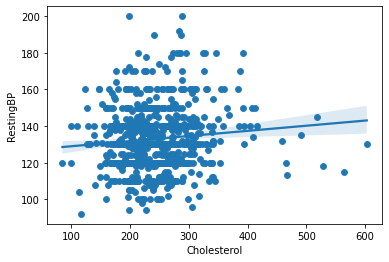

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#read in data 
df = pd.read_csv("heart.csv")

#remove missing data
df = df[df['RestingBP'] != 0]
df = df[df['Cholesterol'] != 0]

#make scatter plot
sns.scatterplot(data=df,x='Cholesterol',y='RestingBP')

#make linear regression line
sns.regplot(x = 'Cholesterol', y = 'RestingBP', data = df)

We can see a slight increase in blood pressure as cholesterol levels rise. This probably means higher cholesterol levels can lead to a slight increase in blood pressure levels.

**Machine Learning: Decision Tree**

A decision tree is a machine learning technique. It is structured like the typical tree data structure. The idea is that the machine takes in our data and uses algorithms and math to try and create a decision tree that can make a predictive decision. The internal nodes are for making decisions and the leaves are predictions. Learn more about decision trees on this webpage: https://en.wikipedia.org/wiki/Decision_tree. 

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#import data 
df = pd.read_csv("heart.csv")

#make encoders for making labels numeric
ChestPainType = LabelEncoder()
RestingECG = LabelEncoder()
ExcerciseAngina = LabelEncoder()
ST_Slope = LabelEncoder()
Sex = LabelEncoder()

#do proper encodings
df['ChestPainType'] = ChestPainType.fit_transform(df['ChestPainType'])
df['RestingECG'] = ChestPainType.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = ChestPainType.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = ChestPainType.fit_transform(df['ST_Slope'])
df['Sex'] = ChestPainType.fit_transform(df['Sex'])

#remove missing data
df = df[df['Cholesterol'] != 0]
df = df[df['RestingBP'] != 0]

#set input data
data = df.drop('HeartDisease', axis='columns')

#set target data (heart disease)
target = df['HeartDisease']

#split training and test data
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.3, random_state=0)

# create classifier
clf = DecisionTreeClassifier(random_state=0)

# fit the data 
clf.fit(x_train, y_train)

# check accuracy of model
predicted = clf.predict(x_test)
print(accuracy_score(y_test, predicted) * 100)


76.33928571428571


Overall, we get a 76.3% accuracy score. This is not bad at all since 3 out of 4 people who use this model would generally get a correct diagnosise. The accuracy likely indicates that the collective group of inputs give a fairly good indicator of whether of not an individual has heart disease. One way that may improve the results is storing seperate types of variables for different types of cholesterol. Our model only considered total cholesterol. Also considering types of cholesterol like LDL and HDL would probably make the model more accurate because it is a common scientific belief that LDL is a cholesterol that is bad for the heart and HDL is a cholesterol that is good for the heart. Looking at even more types of cholesterol than just LDL and HDL could enhance the model even more. We could also look at other factors such as weight and body fat percentage.

**Machine Learning: Random Forest**

Our decision tree algorithm predicted heart disease pretty well. Let's try using a random forest algorithm to see if we can get better accuracy. A random forest machine learning algorithm trains many decision trees. The random forest then uses a voting system that accounts for all of these decision trees and makes one single prediction based on the results of all of the decision trees. A greate resource for learning more about random forests is at this site: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf.

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#import data 
heart_data = pd.read_csv("heart.csv")

#make label encoders
ChestPainType = LabelEncoder()
RestingECG = LabelEncoder()
ExcerciseAngina = LabelEncoder()
ST_Slope = LabelEncoder()
Sex = LabelEncoder()

#encode labels as numerics
heart_data['ChestPainType'] = ChestPainType.fit_transform(heart_data['ChestPainType'])
heart_data['RestingECG'] = ChestPainType.fit_transform(heart_data['RestingECG'])
heart_data['ExerciseAngina'] = ChestPainType.fit_transform(heart_data['ExerciseAngina'])
heart_data['ST_Slope'] = ChestPainType.fit_transform(heart_data['ST_Slope'])
heart_data['Sex'] = ChestPainType.fit_transform(heart_data['Sex'])

#remove missing data
heart_data = heart_data[heart_data['Cholesterol'] != 0]
heart_data = heart_data[heart_data['RestingBP'] != 0]

# set input data
data = heart_data.drop('HeartDisease', axis='columns')

#set target data (heart disease)
target = heart_data['HeartDisease']


# split between test data and training data 
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.3, random_state=0)

# assign classifier
randomforest = RandomForestClassifier()

# fit the data
randomforest.fit(x_train, y_train)

# check accuracy of model
predicted = randomforest.predict(x_test)
print(accuracy_score(y_test, predicted) * 100)

86.16071428571429


We can see that we got an accuracy score of 86.16%. This means roughly 86 out of 100 people would get a correct diagnosise from the model. This means that the random forest appears to be a better model for predicting heart disease with the given data than the decision tree machine learning algorithm. This means that the algorithm can get a reaonably high gauge from the input data on wheathe that indiviual has heart diesase. I think adding more factors like quantity of various types of cholesterol, weight, and body fat percentage could enhance the model's accuracy even more. 

**Machine Learning Reflection**

Overall, we can see that the decision tree algorithm had an accuracy of 76.3% and the random forest algorithm had an accuracy of 86.2%. It appears that the random forest was better at predicting heart disease. This model probably needs more variables to consider in order to be optimal. Adding data points such as quantity of various cholesterol types in the blood stream, weight, and body fat percentage are variables that would likely make it easier to predict heart disease in an individual.

**Conclusion**

In conclusion, it seems that heart disease becomes much more prevelant as people age. It appears that cholesterol levels over about 251 in serum cholesterol by mm/dl can significantly increase the chances of heart disease. It also appears that higher blood pressure and lower maximum heart rate are linked to heart disease. We also discovered that a random forest algorithm is 86% accurate at determining if an individual has heart disease. This means that the variables in the data set have links to heart disease that a machine learning algorithm is able to see. I think adding more variables like quantity of various types of cholesterol, weight, and body fat percentage could enhance the random forest model's accuracy and could help bring even more heart disease links to light. 